# DAV 6150 Module 2 Assignment

## Introduction

 ### Purpose
 construct a cross validated linear regression model that predicts the weight of a passenger vehicle

### For the Phase I: Data Acquisition, Data Preparation & Exploratory Data Analysis:
We have loaded the data about automoblies and then create a Dataframe with a subset of the columns. After some basic cleaning about our dataset, we are going to show the EDA by using seaborn, which enables us to use histograms and box plots to show the distribution of our data.
### For the Phase II:Build Predictive Models
we plan to evaluate the model by splitting it into train and test sets and get the score for each model.

The link of references:
- https://archive.ics.uci.edu/ml/datasets/Automobile

## Data Acquisition

In [162]:
# load the pandas library
import pandas as pd

# start by reading a set of data from github
filename = "https://raw.githubusercontent.com/675874815/DAV-5401/master/M2_Data.csv"
df = pd.read_csv(filename, header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [163]:
# how many observations are contained within the data set?
len(df)

205

## Data Preparation

In [164]:
# create a subset of 9 columns
# use the 'copy()' function if you want to preserve the original data frame
df_sub = df.iloc[:, [12, 11, 10, 9, 16, 21, 22, 23, 13]].copy()

In [165]:
# check results: do we have the 9 columns we want? Check the first 10 rows
df_sub.head(10)

,12,11,10,9,16,21,22,23,13
0,48.8,64.1,168.8,88.6,130,111,5000,21,2548
1,48.8,64.1,168.8,88.6,130,111,5000,21,2548
2,52.4,65.5,171.2,94.5,152,154,5000,19,2823
3,54.3,66.2,176.6,99.8,109,102,5500,24,2337
4,54.3,66.4,176.6,99.4,136,115,5500,18,2824
5,53.1,66.3,177.3,99.8,136,110,5500,19,2507
6,55.7,71.4,192.7,105.8,136,110,5500,19,2844
7,55.7,71.4,192.7,105.8,136,110,5500,19,2954
8,55.9,71.4,192.7,105.8,131,140,5500,17,3086
9,52.0,67.9,178.2,99.5,131,160,5500,16,3053


In [166]:
# add meaningful column names
df_sub.columns = ['height', 'width', 'length', 'wheel-base', 'engine-size', 'horsepower', 'peak-rpm', 'city-mpg', 'curb-weight']
# sanity check
df_sub.head(5)

,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg,curb-weight
0,48.8,64.1,168.8,88.6,130,111,5000,21,2548
1,48.8,64.1,168.8,88.6,130,111,5000,21,2548
2,52.4,65.5,171.2,94.5,152,154,5000,19,2823
3,54.3,66.2,176.6,99.8,109,102,5500,24,2337
4,54.3,66.4,176.6,99.4,136,115,5500,18,2824


In [167]:
import numpy as np
# replace "?" values with "nan"
df_sub.horsepower.replace('?', np.nan, inplace = True)
df_sub['peak-rpm'].replace('?', np.nan, inplace = True)

In [168]:
# change the data type of these 2 columns
df_sub['horsepower'] = df_sub['horsepower'].astype(float)
df_sub['peak-rpm'] = df_sub['peak-rpm'].astype(float)

In [169]:
# check the data for null values
df_sub.isnull().sum()

height         0
width          0
length         0
wheel-base     0
engine-size    0
horsepower     2
peak-rpm       2
city-mpg       0
curb-weight    0
dtype: int64

In [170]:
# drop null values
car = df_sub.dropna()

In [171]:
# check the data for null values
car.isnull().sum()

height         0
width          0
length         0
wheel-base     0
engine-size    0
horsepower     0
peak-rpm       0
city-mpg       0
curb-weight    0
dtype: int64

In [172]:
len(car)

203

## Exploratory Data Analysis (EDA)

Summary statistics for each attribute and appropriate graphical analysis for each attributes using Seaborn.

### Data Summary
There are 9 attributes in car dataset:

1. height: continuous from 47.8 to 59.8.

2. width: continuous from 60.3 to 72.3.

3. length: continuous from 141.1 to 208.1.

4. wheel-base: continuous from 86.6 120.9.

5. engine-size: continuous from 61 to 326.

6. horsepower: continuous from 48 to 288.

7. peak-rpm: continuous from 4150 to 6600.

8. city-mpg: continuous from 13 to 49.

9. curb-weight: continuous from 1488 to 4066.

The specific type of each data is below:

In [173]:
print(car.dtypes)

height         float64
width          float64
length         float64
wheel-base     float64
engine-size      int64
horsepower     float64
peak-rpm       float64
city-mpg         int64
curb-weight      int64
dtype: object


As we can see, the data types of "height", "width", "length", "wheel-base", "horsepower", "peak-rpm"are float, and others are int.

### Preliminary Data Analysis - height

Now we gather descriptive statistics on "height" and create a histogram and a box plot to display these statistics in visualization so that we can quickly identify the shape of the distribution.

In [174]:
# get descriptive stats for "height"
car['height'].describe()

count    203.000000
mean      53.733498
std        2.442864
min       47.800000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: height, dtype: float64

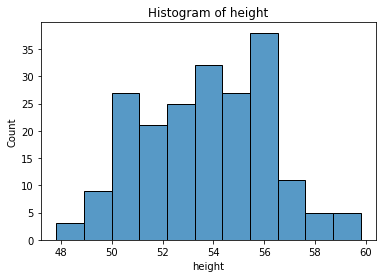

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt
# define the type of plot you want to appear
sns.histplot(car['height'])
# give the plot a title
plt.title('Histogram of height')
# show the histogram
plt.show();

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


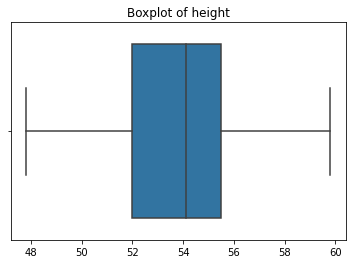

In [176]:
# define the type of plot you want to appear
sns.boxplot(car['height'], orient = 'v')

# give the plot a title
plt.title('Boxplot of height')

# Here we'll blank out the x-axis label since it isn't really meaningful
# for a box plot
plt.xlabel(' ')

plt.show();

We can see from the descriptive statistics that the distribution of "height" is skewed right with a mean of 53.72, a minimum of 47.80, a max of 59.80, and a standard deviation of 2.44.

### Preliminary Data Analysis - width

Now we gather descriptive statistics on "width" and create a histogram and a box plot to display these statistics in visualization so that we can quickly identify the shape of the distribution.

In [177]:
# get descriptive stats for "width"
car['width'].describe()

count    203.000000
mean      65.901478
std        2.154835
min       60.300000
25%       64.050000
50%       65.500000
75%       66.900000
max       72.300000
Name: width, dtype: float64

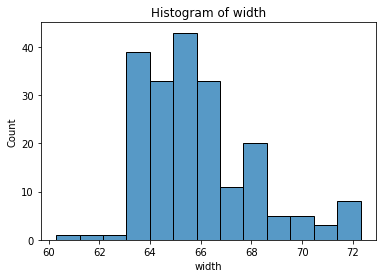

In [178]:
# define the type of plot you want to appear
sns.histplot(car['width'])
# give the plot a title
plt.title('Histogram of width')
# show the histogram
plt.show();

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


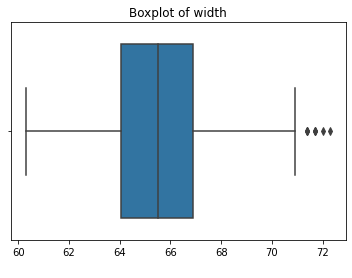

In [179]:
# define the type of plot you want to appear
sns.boxplot(car['width'], orient = 'v')

# give the plot a title
plt.title('Boxplot of width')

# Here we'll blank out the x-axis label since it isn't really meaningful
# for a box plot
plt.xlabel(' ')

plt.show();

We can see from the descriptive statistics that the distribution of "width" is skewed right with a mean of 65.91, a minimum of 60.30, a max of 72.30, and a standard deviation of 2.14.Based on this information as well as the histogram and the box plot, there do appear to 4 outliers.

### Preliminary Data Analysis - length

Now we gather descriptive statistics on "length" and create a histogram and a box plot to display these statistics in visualization so that we can quickly identify the shape of the distribution.

In [180]:
# get descriptive stats for "length"
car['length'].describe()

count    203.000000
mean     173.999015
std       12.385511
min      141.100000
25%      166.300000
50%      173.200000
75%      183.300000
max      208.100000
Name: length, dtype: float64

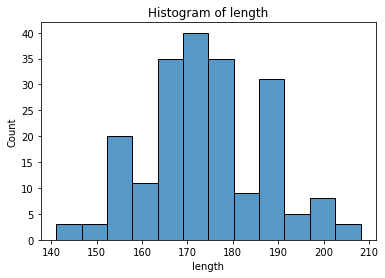

In [181]:
# define the type of plot you want to appear
sns.histplot(car['length'])
# give the plot a title
plt.title('Histogram of length')
# show the histogram
plt.show();

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


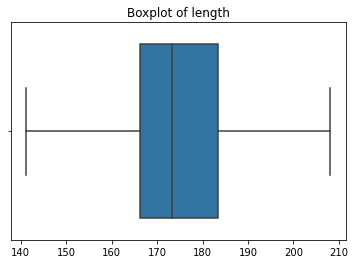

In [182]:
# define the type of plot you want to appear
sns.boxplot(car['length'], orient = 'v')

# give the plot a title
plt.title('Boxplot of length')

# Here we'll blank out the x-axis label since it isn't really meaningful
# for a box plot
plt.xlabel(' ')

plt.show();

We can see from the descriptive statistics that the distribution of "length" is skewed right with a mean of 174.05, a minimum of 141.10, a max of 208.10, and a standard deviation of 12.34.

### Preliminary Data Analysis - wheel-base

Now we gather descriptive statistics on "wheel-base" and create a histogram and a box plot to display these statistics in visualization so that we can quickly identify the shape of the distribution.

In [183]:
# get descriptive stats for "wheel-base"
car['wheel-base'].describe()

count    203.000000
mean      98.782759
std        6.045680
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheel-base, dtype: float64

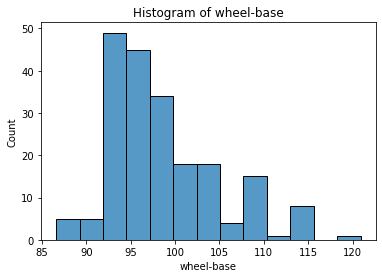

In [184]:
# define the type of plot you want to appear
sns.histplot(car['wheel-base'])
# give the plot a title
plt.title('Histogram of wheel-base')
# show the histogram
plt.show();

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


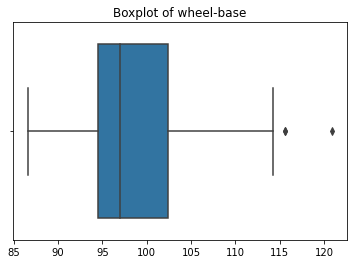

In [185]:
# define the type of plot you want to appear
sns.boxplot(car['wheel-base'], orient = 'v')

# give the plot a title
plt.title('Boxplot of wheel-base')

# Here we'll blank out the x-axis label since it isn't really meaningful
# for a box plot
plt.xlabel(' ')

plt.show();

We can see from the descriptive statistics that the distribution of "wheel-base" is skewed right with a mean of 98.76, a minimum of 86.60, a max of 120.90, and a standard deviation of 6.02.Based on this information as well as the histogram and the box plot, there do appear to 2 outliers.

### Preliminary Data Analysis - engine-size

Now we gather descriptive statistics on "engine-size" and create a histogram and a box plot to display these statistics in visualization so that we can quickly identify the shape of the distribution.

In [186]:
# get descriptive stats for "engine-size"
car['engine-size'].describe()

count    203.000000
mean     126.857143
std       41.845239
min       61.000000
25%       97.000000
50%      119.000000
75%      143.000000
max      326.000000
Name: engine-size, dtype: float64

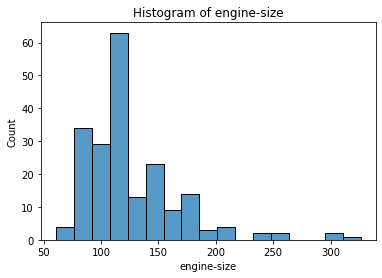

In [187]:
# define the type of plot you want to appear
sns.histplot(car['engine-size'])
# give the plot a title
plt.title('Histogram of engine-size')
# show the histogram
plt.show();

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


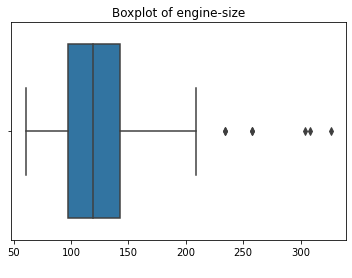

In [188]:
# define the type of plot you want to appear
sns.boxplot(car['engine-size'], orient = 'v')

# give the plot a title
plt.title('Boxplot of engine-size')

# Here we'll blank out the x-axis label since it isn't really meaningful
# for a box plot
plt.xlabel(' ')

plt.show();

We can see from the descriptive statistics that the distribution of "engine-size" is skewed right with a mean of 126.91, a minimum of 61, a max of 326, and a standard deviation of 41.64.Based on this information as well as the histogram and the box plot, there do appear to 6 outliers.

### Preliminary Data Analysis - horsepower

Now we gather descriptive statistics on "horsepower" and create a histogram and a box plot to display these statistics in visualization so that we can quickly identify the shape of the distribution.

In [189]:
# get descriptive stats for "horsepower"
car['horsepower'].describe()

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

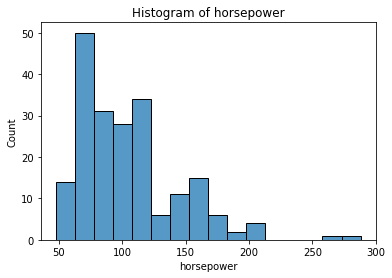

In [190]:
# define the type of plot you want to appear
sns.histplot(car['horsepower'])
# give the plot a title
plt.title('Histogram of horsepower')
# show the histogram
plt.show();

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


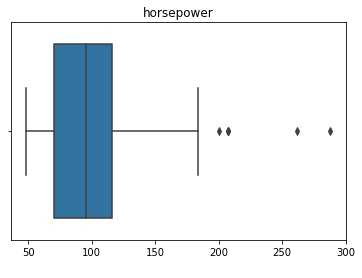

In [191]:
# define the type of plot you want to appear
sns.boxplot(car['horsepower'], orient = 'v')

# give the plot a title
plt.title('horsepower')

# Here we'll blank out the x-axis label since it isn't really meaningful
# for a box plot
plt.xlabel(' ')

plt.show();

We can see from the descriptive statistics that the distribution of "horsepower" is skewed right with a mean of 104.26, a minimum of 48, a max of 288, and a standard deviation of 39.71.Based on this information as well as the histogram and the box plot, there do appear to 4 outliers.

### Preliminary Data Analysis - peak-rpm

Now we gather descriptive statistics on "peak-rpm" and create a histogram and a box plot to display these statistics in visualization so that we can quickly identify the shape of the distribution.

In [192]:
# get descriptive stats for "peak-rpm"
car['peak-rpm'].describe()

count     203.000000
mean     5125.369458
std       479.334560
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak-rpm, dtype: float64

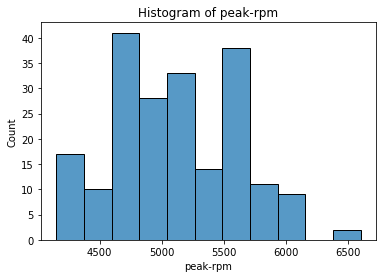

In [193]:
# define the type of plot you want to appear
sns.histplot(car['peak-rpm'])
# give the plot a title
plt.title('Histogram of peak-rpm')
# show the histogram
plt.show();

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


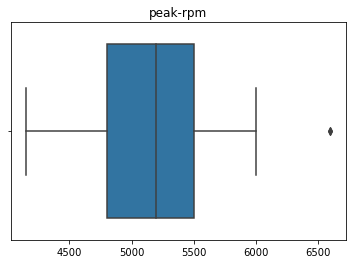

In [194]:
# define the type of plot you want to appear
sns.boxplot(car['peak-rpm'], orient = 'v')

# give the plot a title
plt.title('peak-rpm')

# Here we'll blank out the x-axis label since it isn't really meaningful
# for a box plot
plt.xlabel(' ')

plt.show();

We can see from the descriptive statistics that the distribution of "peak-rpm" is skewed right with a mean of 5125.37, a minimum of 4150, a max of 6600, and a standard deviation of 479.33.Based on this information as well as the histogram and the box plot, there do appear to 1 outlier.

### Preliminary Data Analysis - city-mpg

Now we gather descriptive statistics on "city-mpg" and create a histogram and a box plot to display these statistics in visualization so that we can quickly identify the shape of the distribution.

In [195]:
# get descriptive stats for "city-mpg"
car['city-mpg'].describe()

count    203.000000
mean      25.241379
std        6.570702
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: city-mpg, dtype: float64

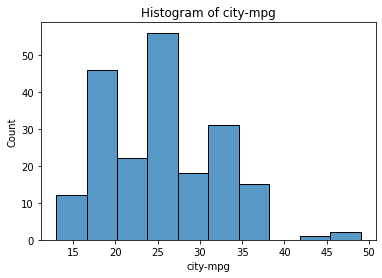

In [196]:
# define the type of plot you want to appear
sns.histplot(car['city-mpg'])
# give the plot a title
plt.title('Histogram of city-mpg')
# show the histogram
plt.show();

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


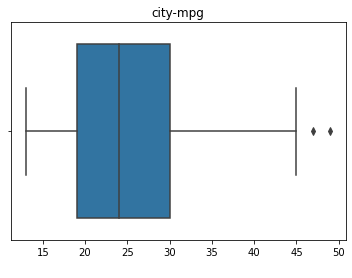

In [197]:
# define the type of plot you want to appear
sns.boxplot(car['city-mpg'], orient = 'v')

# give the plot a title
plt.title('city-mpg')

# Here we'll blank out the x-axis label since it isn't really meaningful
# for a box plot
plt.xlabel(' ')

plt.show();

We can see from the descriptive statistics that the distribution of "city-mpg" is skewed right with a mean of 25.24, a minimum of 13, a max of 49, and a standard deviation of 6.57.Based on this information as well as the histogram and the box plot, there do appear to 2 outliers.

### Preliminary Data Analysis - curb-weight

Now we gather descriptive statistics on "curb-weight" and create a histogram and a box plot to display these statistics in visualization so that we can quickly identify the shape of the distribution.

In [198]:
# get descriptive stats for "curb-weight"
car['curb-weight'].describe()

count     203.000000
mean     2555.921182
std       523.205555
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2943.500000
max      4066.000000
Name: curb-weight, dtype: float64

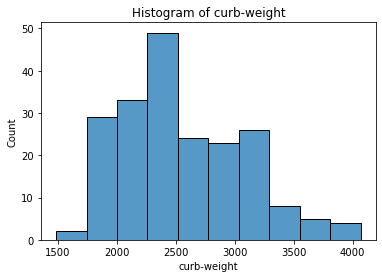

In [199]:
# define the type of plot you want to appear
sns.histplot(car['curb-weight'])
# give the plot a title
plt.title('Histogram of curb-weight')
# show the histogram
plt.show();

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


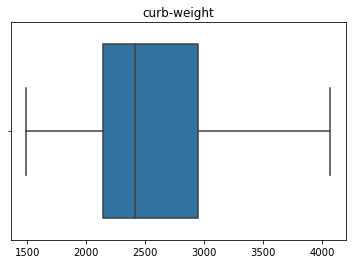

In [200]:
# define the type of plot you want to appear
sns.boxplot(car['curb-weight'], orient = 'v')

# give the plot a title
plt.title('curb-weight')

# Here we'll blank out the x-axis label since it isn't really meaningful
# for a box plot
plt.xlabel(' ')

plt.show();

We can see from the descriptive statistics that the distribution of "curb-weight" is skewed right with a mean of 2555.92, a minimum of 1488, a max of 4066, and a standard deviation of 523.21.

### Data Exploration

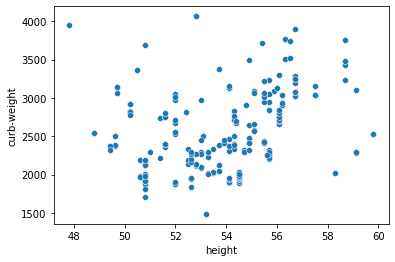

In [201]:
# scatterplot of height vs. curb-weight
sns.scatterplot(x = 'height', y = 'curb-weight', data = car);

From this plot, we can see that there is no obvious linear relationship between height vs. curb-weight.

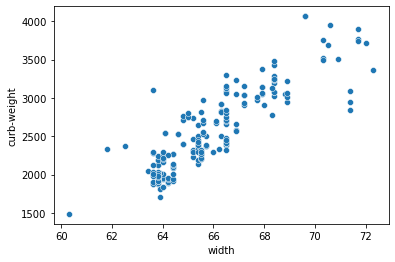

In [202]:
# scatterplot of width vs. curb-weight
sns.scatterplot(x = 'width', y = 'curb-weight', data = car);

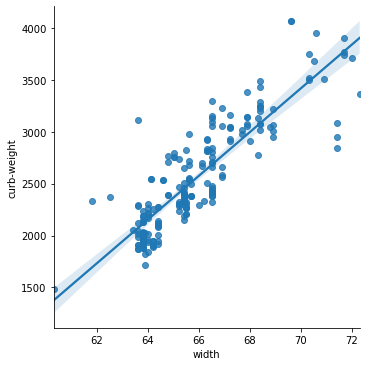

In [203]:
# fit a linear model to the scatter plot
sns.lmplot(x = 'width', y = 'curb-weight', data = car);

From these 2 plots, we can see that there is an obvious linear relationship between width vs. curb-weight.

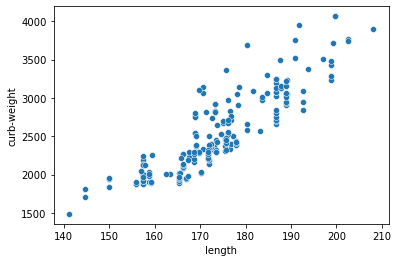

In [204]:
# scatterplot of length vs. curb-weight
sns.scatterplot(x = 'length', y = 'curb-weight', data = car);

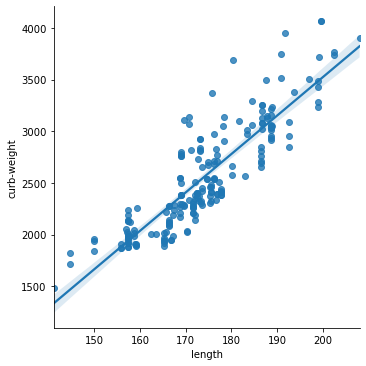

In [205]:
# fit a linear model to the scatter plot
sns.lmplot(x = 'length', y = 'curb-weight', data = car);

From these 2 plots, we can see that there is an obvious linear relationship between length vs. curb-weight.

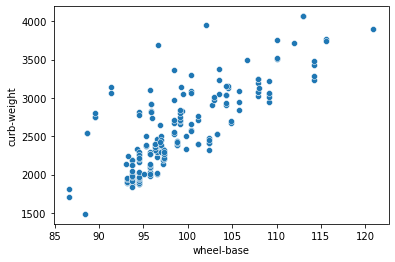

In [206]:
# scatterplot of wheel-base vs. curb-weight
sns.scatterplot(x = 'wheel-base', y = 'curb-weight', data = car);

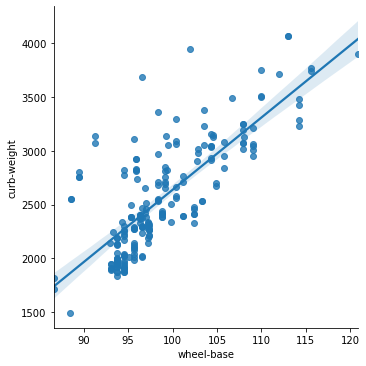

In [207]:
# fit a linear model to the scatter plot
sns.lmplot(x = 'wheel-base', y = 'curb-weight', data = car);

From these 2 plots, we can see that there is an obvious linear relationship between wheel_base vs. curb-weight.

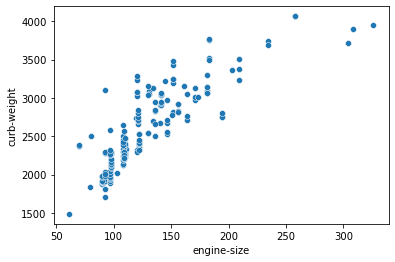

In [208]:
# scatterplot of engine-size vs. curb-weight
sns.scatterplot(x = 'engine-size', y = 'curb-weight', data = car);

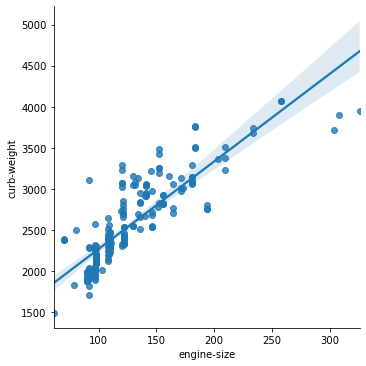

In [209]:
# fit a linear model to the scatter plot
sns.lmplot(x = 'engine-size', y = 'curb-weight', data = car);

From these 2 plots, we can see that there is an obvious linear relationship between engine-size vs. curb-weight.

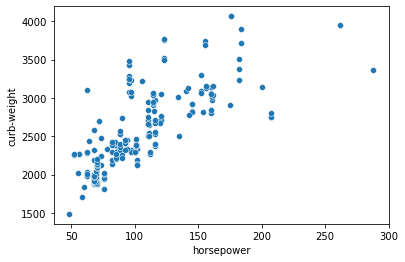

In [210]:
# scatterplot of horsepower vs. curb-weight
sns.scatterplot(x = 'horsepower', y = 'curb-weight', data = car);

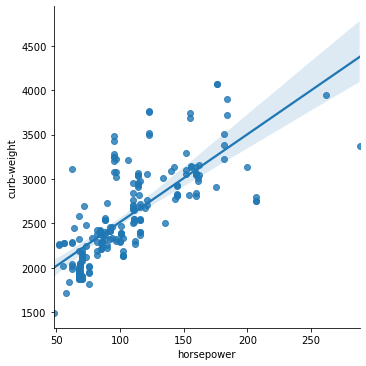

In [211]:
# fit a linear model to the scatter plot
sns.lmplot(x = 'horsepower', y = 'curb-weight', data = car);

From these 2 plots, we can see that there is an obvious linear relationship between horsepower vs. curb-weight.

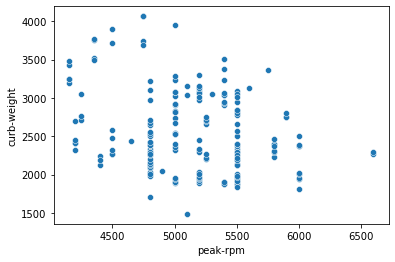

In [212]:
# scatterplot of peak-rpm vs. curb-weight
sns.scatterplot(x = 'peak-rpm', y = 'curb-weight', data = car);

From this plot, we can see that there is no obvious linear relationship between peak-rpm vs. curb-weight.

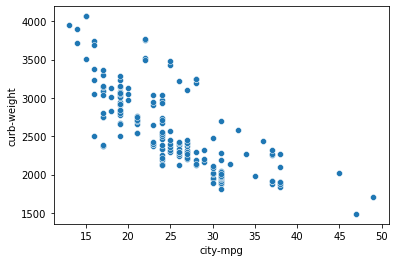

In [213]:
# scatterplot of city-mpg vs. curb-weight
sns.scatterplot(x = 'city-mpg', y = 'curb-weight', data = car);

From this plot, we can see that there is no obvious linear relationship between city-mpg vs. curb-weight.

## Regression Model Construction & Evaluation

### Data splitting

In [214]:
# load the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

In [215]:
# move the response variable to a separate variable
y = car['curb-weight']

In [216]:
# check results
y.head()

0    2548
1    2548
2    2823
3    2337
4    2824
Name: curb-weight, dtype: int64

In [217]:
# If you want to preserve the original dataframe in its entirety, make a copy of the original dataframe 
# so that the original is preserved
X = car.copy()

In [218]:
# now drop the "curb-weight" column from 'X' so that the response variable is removed from the explanatory variables
X.drop('curb-weight', axis=1, inplace=True)

In [219]:
# The "curb-weight" column has been removed from the data set
X.head()

,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg
0,48.8,64.1,168.8,88.6,130,111.0,5000.0,21
1,48.8,64.1,168.8,88.6,130,111.0,5000.0,21
2,52.4,65.5,171.2,94.5,152,154.0,5000.0,19
3,54.3,66.2,176.6,99.8,109,102.0,5500.0,24
4,54.3,66.4,176.6,99.4,136,115.0,5500.0,18


In [220]:
# Now split the data into training and testing subsets. 
# We'll set aside 30% of the data for testing purposes; Remember to make sure you specify a value for the inital random_state
# if you want to have the ability to reproduce the exact same training + testing subsets repeatedly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [221]:
# Let's check the results
len(X_train)

142

In [222]:
len(X_test)

61

In [223]:
# Let's check the row indices of the new objects to see whether they match
y_test.head()

204    3062
190    2221
23     2128
186    2275
11     2395
Name: curb-weight, dtype: int64

In [224]:
X_test.head()

,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg
204,55.5,68.9,188.8,109.1,141,114.0,5400.0,19
190,51.4,64.0,165.7,94.5,109,90.0,5500.0,24
23,50.8,63.8,157.3,93.7,98,102.0,5500.0,24
186,55.7,65.5,171.7,97.3,109,85.0,5250.0,27
11,54.3,64.8,176.8,101.2,108,101.0,5800.0,23


In [225]:
X_train.head()

,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg
95,53.3,63.8,165.6,94.5,97,69.0,5200.0,31
45,52.0,63.6,155.9,94.5,90,70.0,5400.0,38
133,56.1,66.5,186.6,99.1,121,110.0,5250.0,21
33,52.6,64.0,150.0,93.7,92,76.0,6000.0,30
134,56.1,66.5,186.6,99.1,121,110.0,5250.0,21


In [226]:
y_train.head()

95     2028
45     1909
133    2695
33     1940
134    2707
Name: curb-weight, dtype: int64

### Model Training & Cross Validation

#### linear regression model1

In [227]:
# load the LinearRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LinearRegression

# load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score

# create a new dataframe containing only 'engine-size', 'width', 'length' variables (our explanatory variables for the linear
# regression model)
X1_train = X_train[['engine-size', 'width', 'length']].copy()

# sanity check
X1_train.head()

,engine-size,width,length
95,97,63.8,165.6
45,90,63.6,155.9
133,121,66.5,186.6
33,92,64.0,150.0
134,121,66.5,186.6


In [228]:
# Assing the model function you want to use to a variable
model = LinearRegression()

# fit the model using 5-fold cross validation; note how the 'model' variable created above is used as a parameter for the 
# cross_val_score() function. Also note how we can specify the number of folds to use during cross validation via the 'cv' 
# parameter
scores = cross_val_score(model, X1_train, y_train, cv=5)

# print out the R^2 metrics derived from the K-fold cross validation of our linear regression model
print (scores)

[0.88468484 0.92590267 0.79833835 0.87708342 0.91382948]


In [229]:
# calculate the average R^2 across all 5 folds
np.mean(scores)

0.8799677520440217

Our 5-fold cross validation shows that our model has a cross validated R^2 of 88%

#### linear regression model2

In [230]:
# create a new dataframe containing only 'wheel-base', 'engine-size', 'horsepower' (our explanatory variables for the linear
# regression model)
X2_train = X_train[['wheel-base', 'engine-size', 'horsepower']].copy()

# sanity check
X2_train.head()

,wheel-base,engine-size,horsepower
95,94.5,97,69.0
45,94.5,90,70.0
133,99.1,121,110.0
33,93.7,92,76.0
134,99.1,121,110.0


In [231]:
# fit the model using 5-fold cross validation; note how the 'model' variable created above is used as a parameter for the 
# cross_val_score() function. Also note how we can specify the number of folds to use during cross validation via the 'cv' 
# parameter
scores2 = cross_val_score(model, X2_train, y_train, cv=5)

# print out the R^2 metrics derived from the K-fold cross validation of our linear regression model
print (scores2)

[0.90595087 0.87721701 0.75113981 0.85311855 0.88821842]


In [232]:
# calculate the average R^2 across all 5 folds
np.mean(scores2)

0.8551289302382239

Our 5-fold cross validation shows that our model has a cross validated R^2 of 85.5%

## Conclusion

From the R^2 scores, we can see that linear model 1 is better than another one.So 'engine-size', 'width', 'length' are better choices as explanatory variables to predict 'curb-weight'.